#문제1

2-2번 → 단순 선형 회귀는 가중치의 개수가 한 개 이다.

3-1번 → 선형 회귀에서 선형이냐 비선형이냐를 결정하는 대상은 ‘변수’가 아니라 ‘회귀 계수’이기 때문에 독립변수와 종속변수 간의 관계를 보고 다중 선형 회귀가 비선형라고 볼 수 없다.

5번 → 단순 선형 회귀와 다중 선형 회귀 둘 다 입력행렬과 가중치행렬의 값은 같을 수도 있고 다를 수도 있다.

#문제2

3번 → 결정계수의 식은 1 - ((타깃 - 예측)^2의 합) / (타깃  - 평균)^2의 합이기에 (타깃 - 예측)이 오차이므로 오차가 커진다면 ((타깃 - 예측)^2의 합) / (타깃  - 평균)^2이 커지므로 결정계수 값은 작아진다. 즉 오차와 R^2 결정계수는 반비례한다.

#문제3

In [ ]:
month = np.array([1,3,5,7,9,11])
price = np.array([130, 128, 132, 140, 153, 150])

parm = [2, 125]

df = pd.DataFrame({'month' : month,
                   'price' : price})

df['price_predict'] = parm[0] * month + parm[1]
mse = np.sum((df['price'] - df['price_poly']) ** 2) / 6

point = np.arange(1, 12)

plt.scatter(df['month'], df['price'])
plt.plot(point, parm[0] * point + parm[1])
plt.title('price predict')
plt.xlabel('month')
plt.ylabel('price')
plt.show()

for i in range(6) : 
    print('%d 월 주가 = %d, 예측 주가 = %d' %(df['month'][i], df['price'][i], df['price_predict'][i]))
    
print('최종 mse : %f' %mse)
print('12월 예상 주가 : %d' %(parm[0] * 12 + parm[1]))

#문제4

5번 → 릿지와 라쏘 모두 과대적합을 방지하며, alpha 값을 조절하여 규제 강도를 조절하여 과소적합을 유도하는 역할을 한다. 하지만 라쏘가 릿지에 비해 과소적합 가능성이 조금 더 낮다. 

#5번

array([1.])

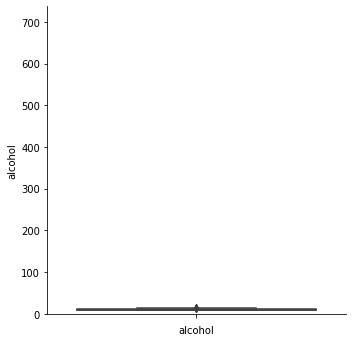

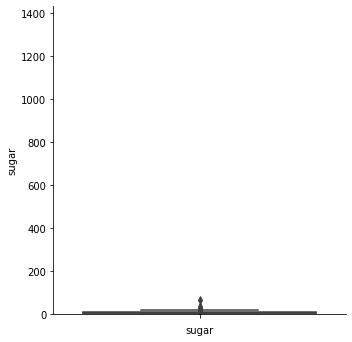

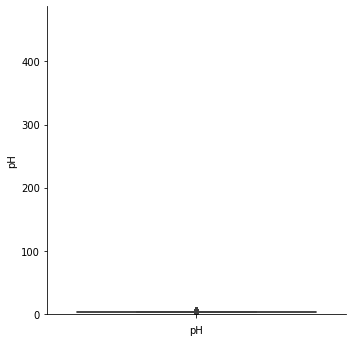

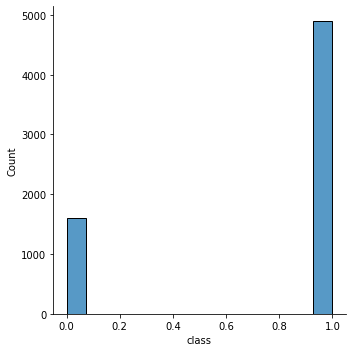

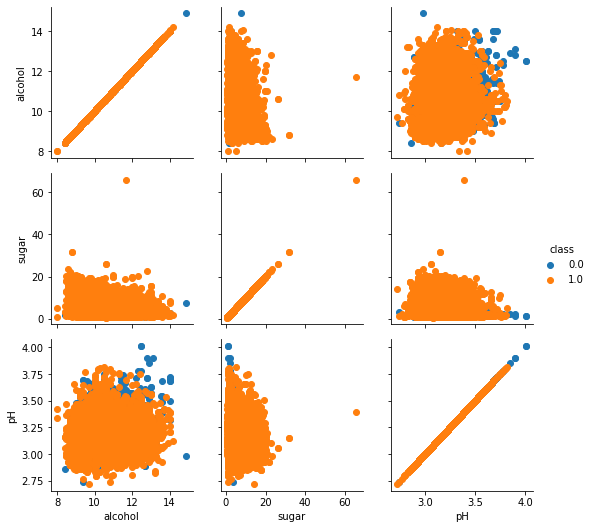

In [16]:
import pandas as pd

wine = pd.read_csv('http://bit.ly/wine-date')

import seaborn as sns

sns.displot(wine['alcohol'])
sns.boxplot(y = wine['alcohol'], data = wine)
sns.displot(wine['sugar'])
sns.boxplot(y = wine['sugar'], data = wine)
sns.displot(wine['pH'])
sns.boxplot(y = wine['pH'], data = wine)
sns.displot(wine['class'])

#pairgrid를 통해 class 값 분포 확인
g = sns.PairGrid(wine, hue = 'class')
g.map(plt.scatter)
g.add_legend()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_tatrget = train_test_split(wine.iloc[:,:3], wine.iloc[:,3])

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target), kn.score(test_scaled, test_target))

data = ([10, 9, 3.5] - ss.mean_) / ss.scale_
kn.predict([data])